In [100]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re 
import math
from statsmodels.formula.api import ols 

In [2]:
updates = pd.read_csv('C:/Users/박예슬/OneDrive/데이터공부/project/Fund Raising 성공의 조건/final_data/updates_new.csv')
assert updates.shape[0] == updates.drop_duplicates().shape[0]

In [3]:
updates.shape

(13032, 8)

In [4]:
updates.created_at = pd.to_datetime(updates.created_at)

In [5]:
updates.created_at.head()

0   2020-06-18 16:24:00+00:00
1   2020-08-30 10:27:00+00:00
2   2020-07-22 16:36:00+00:00
3   2020-07-02 11:18:00+00:00
4   2020-06-22 11:36:00+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [6]:
updates.author_type = updates.author

In [7]:
updates.head()

,chid,update_id,author,author_type,user_profile_url,text,photos,created_at
0,1,24893752,Organizer,Organizer,NaN,Thank you to everyone who donated to Chris’ Go...,False,2020-06-18 16:24:00+00:00
1,3,25518194,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We have raised over $12k for our computers! Th...,False,2020-08-30 10:27:00+00:00
2,3,25184752,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,No matter what school looks like in September ...,False,2020-07-22 16:36:00+00:00
3,3,25010100,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,Our campaign is 25% there! Thank you so much t...,False,2020-07-02 11:18:00+00:00
4,3,24922594,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We&#039;ve raised $4k towards our goal since F...,True,2020-06-22 11:36:00+00:00


In [8]:
assert updates.shape[0] == updates.drop_duplicates().shape[0]

# 한 캠페인 당 몇번의 update가 있었나 ?

In [9]:
# chid id 별 update 갯수 구하기 
updateno =  updates.groupby('chid').count().update_id.to_frame().reset_index()

In [10]:
updateno

,chid,update_id
0,1,1
1,3,4
2,7,1
3,8,2
4,9,2
...,...,...
2519,3891,3
2520,3894,4
2521,3898,1
2522,3903,3


In [11]:
# update 테이블과 updateno 테이블(캠페인당 업데이트 횟수)를 chidno로 merge하기 
merge1 = pd.merge(updates, updateno, on='chid', how='inner')

In [12]:
merge1.head()

,chid,update_id_x,author,author_type,user_profile_url,text,photos,created_at,update_id_y
0,1,24893752,Organizer,Organizer,NaN,Thank you to everyone who donated to Chris’ Go...,False,2020-06-18 16:24:00+00:00,1
1,3,25518194,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We have raised over $12k for our computers! Th...,False,2020-08-30 10:27:00+00:00,4
2,3,25184752,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,No matter what school looks like in September ...,False,2020-07-22 16:36:00+00:00,4
3,3,25010100,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,Our campaign is 25% there! Thank you so much t...,False,2020-07-02 11:18:00+00:00,4
4,3,24922594,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We&#039;ve raised $4k towards our goal since F...,True,2020-06-22 11:36:00+00:00,4


In [13]:
# update 테이블에 updateno 칼럼생성하기 
updates['update_count']= merge1['update_id_y']

In [14]:
updates.head()

,chid,update_id,author,author_type,user_profile_url,text,photos,created_at,update_count
0,1,24893752,Organizer,Organizer,NaN,Thank you to everyone who donated to Chris’ Go...,False,2020-06-18 16:24:00+00:00,1
1,3,25518194,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We have raised over $12k for our computers! Th...,False,2020-08-30 10:27:00+00:00,4
2,3,25184752,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,No matter what school looks like in September ...,False,2020-07-22 16:36:00+00:00,4
3,3,25010100,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,Our campaign is 25% there! Thank you so much t...,False,2020-07-02 11:18:00+00:00,4
4,3,24922594,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We&#039;ve raised $4k towards our goal since F...,True,2020-06-22 11:36:00+00:00,4


In [15]:
# updateno 칼럼 (캠페인당 업데이트 횟수) 분석 
updatenodesc = updates.groupby('chid')['update_count'].count()

In [16]:
updatenodesc.describe(percentiles=[0.75,0.8,0.9,0.95])

count    2524.000000
mean        5.163233
std         5.272922
min         1.000000
50%         3.000000
75%         7.000000
80%         8.000000
90%        14.000000
95%        20.000000
max        20.000000
Name: update_count, dtype: float64

- 한 캠페인 당(chid) 몇번의 update가 있었나?  
    상위 50%는 3번 업데이트, 상위 25%는 7번 업데이트, 상위 10%는 14번, 상위 5%는 20번 업데이트  
    가장 많은 업데이트는 20번, 가장 적은 업데이트는 1번 

In [109]:
# 업데이트 횟수에 따른 캠페인 갯수 
assert updates['chid'].nunique() == updates.groupby('chid').mean()['update_count'].value_counts().sort_index().sum()
counts= updates.groupby('chid').count()['update_count'].value_counts().sort_index().reset_index().rename(columns = {'index':'update_count', 'update_count':'update_count_no'})
counts['percentage'] = (counts.update_count_no / counts.update_count_no.sum()) *100 

In [110]:
counts

,update_count,update_count_no,percentage
0,1,640,25.356577
1,2,425,16.838352
2,3,309,12.242472
3,4,225,8.914422
4,5,172,6.814580
5,6,111,4.397781
6,7,103,4.080824
7,8,92,3.645008
8,9,48,1.901743
9,10,54,2.139461


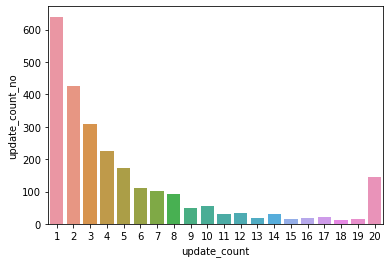

In [19]:
sns.barplot(x='update_count', y='update_count_no', data=counts)

1번 업데이트가 25% 를 차지하고, 2번 또는 3번이 16%, 12 % 를 차지했다. 

# 업데이트 횟수에 따른 펀딩성공의 연관성  

In [20]:
general = pd.read_csv('C:/Users/박예슬/OneDrive/데이터공부/project/Fund Raising 성공의 조건/final_data/general_final.csv')

In [21]:
general.head()

,chid,url,scrape_date,title,created_date,funds_raised,funds_target,picture,org_picture,counts_status_code,...,recent_time_window,funds_raised_dollar,funds_target_dollar,amount_raised_unattributed_dollar,char_age,success,dum_success,group_category,total_comments,update_counts
0,1,https://www.gofundme.com/f/-chris-beaty-memori...,2020-11-03,Chris Beaty Memorial Fund,2020-06-03,175083.0,200000.0,True,False,200,...,48 hours,175083,200000.0,0.0,153,False,0,Funerals & Memorials,74.0,1.0
1,2,https://www.gofundme.com/f/1-prosent-chance,2020-11-03,1 percent chance,2020-06-21,299042.0,2000000.0,True,False,200,...,48 hours,33792,226000.0,0.0,135,False,0,"Medical, Illness & Healing",0.0,0.0
2,3,https://www.gofundme.com/f/100-computers-in-10...,2020-11-04,MELS needs #100ComputersIn100Days,2020-06-19,13845.0,30000.0,True,True,200,...,48 hours,13845,30000.0,8196.0,138,False,0,Others,7.0,4.0
3,4,https://www.gofundme.com/f/100-to-victims-of-t...,2020-11-03,100% to Victims of Taal Volcano in Philippines,2020-01-16,25.0,5000.0,True,True,200,...,48 hours,25,5000.0,0.0,292,False,0,Accidents & Emergencies,0.0,0.0
4,5,https://www.gofundme.com/f/100k-for-center-for...,2020-11-04,$100k for Center for Family Life,2020-11-02,13950.0,100000.0,True,False,200,...,48 hours,13950,100000.0,1100.0,2,False,0,Others,1.0,0.0


In [22]:
general.chid = general.chid.astype(int)

In [23]:
updates.head()

,chid,update_id,author,author_type,user_profile_url,text,photos,created_at,update_count
0,1,24893752,Organizer,Organizer,NaN,Thank you to everyone who donated to Chris’ Go...,False,2020-06-18 16:24:00+00:00,1
1,3,25518194,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We have raised over $12k for our computers! Th...,False,2020-08-30 10:27:00+00:00,4
2,3,25184752,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,No matter what school looks like in September ...,False,2020-07-22 16:36:00+00:00,4
3,3,25010100,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,Our campaign is 25% there! Thank you so much t...,False,2020-07-02 11:18:00+00:00,4
4,3,24922594,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We&#039;ve raised $4k towards our goal since F...,True,2020-06-22 11:36:00+00:00,4


In [24]:
# 업데이트 파일과 제네럴을 chid 로 머지해서 제네럴의 chid와 sucess를 가져온다 
sucess_count = updates.merge(general[['chid','dum_success']], on= 'chid',how='inner') 
#최종적으로 chid, updateno, sucess 가 있는 데이터 가져오기 
success_count= sucess_count[['chid', 'update_count','dum_success']]
success_count = sucess_count.groupby('chid')[['update_count','dum_success']].mean().reset_index()
sucess_count.head()

,chid,update_id,author,author_type,user_profile_url,text,photos,created_at,update_count,dum_success
0,1,24893752,Organizer,Organizer,NaN,Thank you to everyone who donated to Chris’ Go...,False,2020-06-18 16:24:00+00:00,1,0
1,3,25518194,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We have raised over $12k for our computers! Th...,False,2020-08-30 10:27:00+00:00,4,0
2,3,25184752,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,No matter what school looks like in September ...,False,2020-07-22 16:36:00+00:00,4,0
3,3,25010100,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,Our campaign is 25% there! Thank you so much t...,False,2020-07-02 11:18:00+00:00,4,0
4,3,24922594,Organizer,Organizer,https://graph.facebook.com/v7.0/10156402123230...,We&#039;ve raised $4k towards our goal since F...,True,2020-06-22 11:36:00+00:00,4,0


In [25]:
# 업데이트 횟수 당 펀딩에 성공한 캠페인 갯수와 비율 
result = sucess_count.groupby('update_count')['dum_success'].sum().reset_index().rename(columns={'dum_success':'success_cases'})
assert result.success_cases.sum() == sucess_count.dum_success.sum()
result['sucess_cases_percentage'] = (result.success_cases / result.success_cases.sum()) *100
result

,update_count,success_cases,sucess_cases_percentage
0,1,304,6.397306
1,2,342,7.196970
2,3,378,7.954545
3,4,340,7.154882
4,5,315,6.628788
5,6,234,4.924242
6,7,259,5.450337
7,8,248,5.218855
8,9,171,3.598485
9,10,270,5.681818


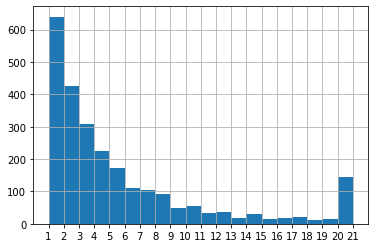

In [26]:
hist_prep = sucess_count.groupby('chid')['update_count'].mean().to_frame()
ax = hist_prep['update_count'].hist(bins=range(1,22))
ax.set_xticks(range(1,22))

In [27]:
result['group'] = (result['update_count']/3-0.01).apply(math.floor)
result['group'] = (result['group'] + 1)*3
result.groupby('group')['sucess_cases_percentage'].sum()

group
3     21.548822
6     18.707912
9     14.267677
12    10.585017
15     7.007576
18     6.081650
21    21.801347
Name: sucess_cases_percentage, dtype: float64

In [28]:
# 위의 내용과 동일하게 함수로 만들기 
def makegroup(df, unit):
    df['group'] = (df['update_count']/unit - 0.01).apply(math.floor)
    df['group'] = (result['group'] + 1)*unit
    df.groupby('group')['sucess_cases_percentage'].sum()
    return df

In [102]:
makegroup = makegroup(df=result, unit=3)
makegroup

,update_count,success_cases,sucess_cases_percentage,group
0,1,304,6.397306,3
1,2,342,7.196970,3
2,3,378,7.954545,3
3,4,340,7.154882,6
4,5,315,6.628788,6
5,6,234,4.924242,6
6,7,259,5.450337,9
7,8,248,5.218855,9
8,9,171,3.598485,9
9,10,270,5.681818,12


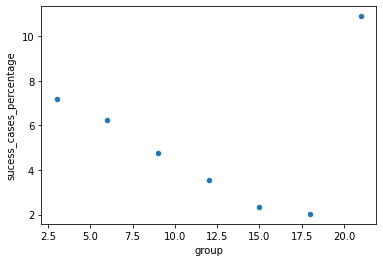

In [30]:
newdf = result.groupby('group')['sucess_cases_percentage'].mean().reset_index()
newdf.plot.scatter(x='group', y='sucess_cases_percentage')

In [101]:
newdf

,group,sucess_cases_percentage
0,3,7.182941
1,6,6.235971
2,9,4.755892
3,12,3.528339
4,15,2.335859
5,18,2.027217
6,21,10.900673


업데이트가 많아질수록 점점 떨어지는 양상을 보인다. 따라서 update를 많이한다고 기부성공이 되지는 않는다.  
마지막 그룹은 데이터한계로 그 이상은 보여줄 수 없기 때문에 outlier로서 인식하고 제외하면 된다.

In [104]:
ols('success_cases ~ update_count', data=makegroup).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_cases   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.2237
Date:                Sat, 28 Nov 2020   Prob (F-statistic):              0.642
Time:                        00:11:06   Log-Likelihood:                -133.64
No. Observations:                  20   AIC:                             271.3
Df Residuals:                      18   BIC:                             273.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      276.7895     94.540      2.928      0.009      78.169     475.410
update_count    -3.7323      7.892     -0.473      0.642     -20.313      12.848
==============================================================================
Omnibus:                       36.483   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.322
Skew:                           2.910   Prob(JB):                     2.00e-21
Kurtosis:                      11.973   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

업데이트 횟수와 펀딩성공은 음의 상관관계를 가지지만 p값이 0.5보다 크므로 통계적으로 유의하지 않다. 

# update를 한 캠페인과 안한 캠페인 비교 (넘어가도 되는 내용) 

## 업데이트 한 캠페인과 1번이라도 한 캠페인간의 최종 모금액 비교 

In [31]:
general

,chid,url,scrape_date,title,created_date,funds_raised,funds_target,picture,org_picture,counts_status_code,...,recent_time_window,funds_raised_dollar,funds_target_dollar,amount_raised_unattributed_dollar,char_age,success,dum_success,group_category,total_comments,update_counts
0,1,https://www.gofundme.com/f/-chris-beaty-memori...,2020-11-03,Chris Beaty Memorial Fund,2020-06-03,175083.0,200000.0,True,False,200,...,48 hours,175083,200000.0,0.0,153,False,0,Funerals & Memorials,74.0,1.0
1,2,https://www.gofundme.com/f/1-prosent-chance,2020-11-03,1 percent chance,2020-06-21,299042.0,2000000.0,True,False,200,...,48 hours,33792,226000.0,0.0,135,False,0,"Medical, Illness & Healing",0.0,0.0
2,3,https://www.gofundme.com/f/100-computers-in-10...,2020-11-04,MELS needs #100ComputersIn100Days,2020-06-19,13845.0,30000.0,True,True,200,...,48 hours,13845,30000.0,8196.0,138,False,0,Others,7.0,4.0
3,4,https://www.gofundme.com/f/100-to-victims-of-t...,2020-11-03,100% to Victims of Taal Volcano in Philippines,2020-01-16,25.0,5000.0,True,True,200,...,48 hours,25,5000.0,0.0,292,False,0,Accidents & Emergencies,0.0,0.0
4,5,https://www.gofundme.com/f/100k-for-center-for...,2020-11-04,$100k for Center for Family Life,2020-11-02,13950.0,100000.0,True,False,200,...,48 hours,13950,100000.0,1100.0,2,False,0,Others,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,3901,https://www.gofundme.com/f/zuayzb-helping-the-...,2020-11-03,Helping the Hansens: A Family in Crisis,2020-07-24,68691.0,15000.0,True,False,200,...,48 hours,68691,15000.0,48000.0,102,True,1,"Medical, Illness & Healing",17.0,0.0
3900,3902,https://www.gofundme.com/f/zurn-strong,2020-11-03,Zurn Strong,2020-10-13,41330.0,20000.0,True,False,200,...,48 hours,41330,20000.0,41330.0,21,True,1,Funerals & Memorials,27.0,0.0
3901,3903,https://www.gofundme.com/f/zw3yb-culver-family,2020-11-03,Sean Culver recovery and rehab fund,2020-08-28,59205.0,50000.0,True,False,200,...,48 hours,59205,50000.0,0.0,67,True,1,"Medical, Illness & Healing",41.0,3.0
3902,3904,https://www.gofundme.com/f/zwqzz9-50000,2020-11-03,In loving memory of Koorosh (Cyrus) Yaghoubian,2020-08-09,58767.0,80000.0,True,True,200,...,48 hours,58767,80000.0,0.0,86,False,0,Funerals & Memorials,1.0,0.0


In [32]:
# general 파일 (업데이트 유무 상관없는 모든 chid)에서 chid,amount_dollar를 가져온다 
all_chid = general[['chid','funds_raised_dollar']]
all_chid.groupby('chid')['funds_raised_dollar'].sum().to_frame().reset_index()

,chid,funds_raised_dollar
0,1,175083
1,2,33792
2,3,13845
3,4,25
4,5,13950
...,...,...
3899,3901,68691
3900,3902,41330
3901,3903,59205
3902,3904,58767


In [33]:
# updates 파일에는 update 된 캠페인만 있으므로, chid 가져와서 전부다 True인 데이터를 만든다 
did_update = updates.chid.drop_duplicates().to_frame()
did_update['did_update'] = True

In [34]:
did_update

,chid,did_update
0,1,True
1,3,True
5,7,True
6,8,True
8,9,True
...,...,...
13020,3891,True
13023,3894,True
13027,3898,True
13028,3903,True


In [35]:
# 상단의 all_chid 와 did_update를 outer merge 하면 did_update가 True 이면 업데이트 한것, False이면 업데이트 안 한것 
main = did_update.merge(all_chid, on='chid', how='outer')
main['did_update'] = main['did_update'].replace(np.NaN,False) 

In [36]:
main

,chid,did_update,funds_raised_dollar
0,1,True,175083
1,3,True,13845
2,7,True,21726
3,8,True,57750
4,9,True,96084
...,...,...,...
3899,3899,False,88518
3900,3900,False,59727
3901,3901,False,68691
3902,3902,False,41330


In [37]:
main['did_update'].value_counts()

True     2524
False    1380
Name: did_update, dtype: int64

In [38]:
table = main.groupby('did_update').mean()['funds_raised_dollar'].to_frame()
table

,funds_raised_dollar
did_update,
False,68081.531159
True,90380.423534


In [39]:
table.iloc[1,0] - table.iloc[0,0]

22298.892374652612

업데이트를 한번이라도 한 캠페인이 안한 캠페인보다 모금액이 약 2만 달러 더 많다. 

## update 횟수와 모금액의 관계 

In [92]:
dollars = general[['chid','funds_raised_dollar']]

In [93]:
numbers = updates.groupby('chid')['update_count'].mean().to_frame().reset_index()

In [94]:
main= numbers.merge(dollars, on='chid', how='outer')

In [95]:
stats = main['funds_raised_dollar'].describe()
iqr = stats['75%'] - stats['25%']
outlier_high = stats['75%'] + 3*iqr
outlier_low = stats['25%'] - 3*iqr
main = main[ (main['funds_raised_dollar'] < outlier_high) & (main['funds_raised_dollar'] > outlier_low) ]
main

,chid,update_count,funds_raised_dollar
0,1,1.0,175083
1,3,4.0,13845
2,7,1.0,21726
3,8,2.0,57750
4,9,2.0,96084
...,...,...,...
3899,3899,NaN,88518
3900,3900,NaN,59727
3901,3901,NaN,68691
3902,3902,NaN,41330


In [96]:
main # outlier 제거된 데이터 

,chid,update_count,funds_raised_dollar
0,1,1.0,175083
1,3,4.0,13845
2,7,1.0,21726
3,8,2.0,57750
4,9,2.0,96084
...,...,...,...
3899,3899,NaN,88518
3900,3900,NaN,59727
3901,3901,NaN,68691
3902,3902,NaN,41330


In [97]:
main['update_count'] = main.update_count.replace(np.NaN, 0)

In [98]:
line = main.groupby('update_count')['funds_raised_dollar'].mean().to_frame().reset_index()
line 

,update_count,funds_raised_dollar
0,0.0,52172.294690
1,1.0,62408.482315
2,2.0,64268.733333
3,3.0,65642.013652
4,4.0,72940.622010
5,5.0,72921.436364
6,6.0,71924.456311
7,7.0,66463.621053
8,8.0,72234.963415
9,9.0,82159.444444


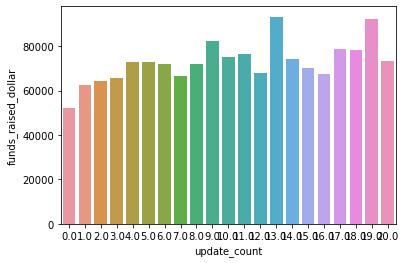

In [99]:
sns.barplot(x='update_count', y='funds_raised_dollar', data=line)

업데이트 횟수가 많을수록 모금액이 많아지는 경향성을 보인다.

In [107]:
ols('funds_raised_dollar ~ update_count', data=line).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     funds_raised_dollar   R-squared:                       0.385
Model:                             OLS   Adj. R-squared:                  0.353
Method:                  Least Squares   F-statistic:                     11.91
Date:                 Sat, 28 Nov 2020   Prob (F-statistic):            0.00268
Time:                         00:15:47   Log-Likelihood:                -216.14
No. Observations:                   21   AIC:                             436.3
Df Residuals:                       19   BIC:                             438.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.358e+04   3162.596     20.103      0.000     5.7e+04    7.02e+04
update_count   933.5830    270.528      3.451      0.003     367.361    1499.805
==============================================================================
Omnibus:                        1.651   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                0.872
Skew:                           0.499   Prob(JB):                        0.646
Kurtosis:                       3.038   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

업데이트 횟수가 증가하면 모금액은 933달러 증가한다. p 값이 0.5보다 낮으므로 통계적으로 유의하다.  
r 값도 30% 이상의 수치를 가진다. 

# updates 란 최신 글에 사진 업데이트를 한 갯수와 모금액의 연관성  

## outlier 제거 전 비교 

In [40]:
yesphoto= updates.groupby('chid')['photos'].sum().to_frame()
new = pd.merge(yesphoto, general, on='chid', how='inner')

In [41]:
new.head()

,chid,photos,url,scrape_date,title,created_date,funds_raised,funds_target,picture,org_picture,...,recent_time_window,funds_raised_dollar,funds_target_dollar,amount_raised_unattributed_dollar,char_age,success,dum_success,group_category,total_comments,update_counts
0,1,0.0,https://www.gofundme.com/f/-chris-beaty-memori...,2020-11-03,Chris Beaty Memorial Fund,2020-06-03,175083.0,200000.0,True,False,...,48 hours,175083,200000.0,0.000,153,False,0,Funerals & Memorials,74.0,1.0
1,3,1.0,https://www.gofundme.com/f/100-computers-in-10...,2020-11-04,MELS needs #100ComputersIn100Days,2020-06-19,13845.0,30000.0,True,True,...,48 hours,13845,30000.0,8196.000,138,False,0,Others,7.0,4.0
2,7,0.0,https://www.gofundme.com/f/1lr10riclc,2020-11-04,BK Bank Thanksgiving Turkey & Xmas Toys Giveaw...,2019-11-09,21726.0,20000.0,True,True,...,48 hours,21726,20000.0,2492.000,361,True,1,Others,32.0,1.0
3,8,0.0,https://www.gofundme.com/f/1ls0zhso2o,2020-11-03,�떒�땵�닄�떟�돜 �뙂�떝�닜�뒘�뒖 �뒯500 �돖�닂�떗 �닔�뒓�뒶�댊�돲�...,2020-04-10,57750.0,100000.0,True,True,...,48 hours,57750,100000.0,0.000,207,False,0,Accidents & Emergencies,58.0,2.0
4,9,0.0,https://www.gofundme.com/f/1sc9471cmo,2020-11-03,Please Help A New Mother Battle Brain Cancer,2019-11-04,82165.0,50000.0,True,True,...,48 hours,96084,58470.0,85260.954,365,True,1,"Medical, Illness & Healing",95.0,2.0


In [70]:
new.shape

(2524, 41)

하단의 아웃라이어 한 것과 128 개 차이남. 전체에서 5% 

## outlier 제거 후 비교 

In [42]:
yesphoto= updates.groupby('chid')['photos'].sum().to_frame()
new = pd.merge(yesphoto, general, on='chid', how='inner')
# yesphoto.merge(general, on='chid',how='inner')

In [43]:
stats = new['funds_raised_dollar'].describe()
iqr = stats['75%'] - stats['25%']
outlier_high = stats['75%'] + 3*iqr
outlier_low = stats['25%'] - 3*iqr
nooutlier = new[ (new['funds_raised_dollar'] < outlier_high) & (new['funds_raised_dollar'] > outlier_low) ]
nooutlier.head()

,chid,photos,url,scrape_date,title,created_date,funds_raised,funds_target,picture,org_picture,...,recent_time_window,funds_raised_dollar,funds_target_dollar,amount_raised_unattributed_dollar,char_age,success,dum_success,group_category,total_comments,update_counts
0,1,0.0,https://www.gofundme.com/f/-chris-beaty-memori...,2020-11-03,Chris Beaty Memorial Fund,2020-06-03,175083.0,200000.0,True,False,...,48 hours,175083,200000.0,0.000,153,False,0,Funerals & Memorials,74.0,1.0
1,3,1.0,https://www.gofundme.com/f/100-computers-in-10...,2020-11-04,MELS needs #100ComputersIn100Days,2020-06-19,13845.0,30000.0,True,True,...,48 hours,13845,30000.0,8196.000,138,False,0,Others,7.0,4.0
2,7,0.0,https://www.gofundme.com/f/1lr10riclc,2020-11-04,BK Bank Thanksgiving Turkey & Xmas Toys Giveaw...,2019-11-09,21726.0,20000.0,True,True,...,48 hours,21726,20000.0,2492.000,361,True,1,Others,32.0,1.0
3,8,0.0,https://www.gofundme.com/f/1ls0zhso2o,2020-11-03,�떒�땵�닄�떟�돜 �뙂�떝�닜�뒘�뒖 �뒯500 �돖�닂�떗 �닔�뒓�뒶�댊�돲�...,2020-04-10,57750.0,100000.0,True,True,...,48 hours,57750,100000.0,0.000,207,False,0,Accidents & Emergencies,58.0,2.0
4,9,0.0,https://www.gofundme.com/f/1sc9471cmo,2020-11-03,Please Help A New Mother Battle Brain Cancer,2019-11-04,82165.0,50000.0,True,True,...,48 hours,96084,58470.0,85260.954,365,True,1,"Medical, Illness & Healing",95.0,2.0


In [71]:
nooutlier.shape

(2396, 41)

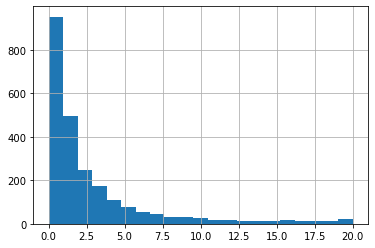

In [44]:
nooutlier['photos'].hist(bins=21)

In [45]:
nooutlierdata = nooutlier.groupby('photos')['funds_raised_dollar'].mean()
nooutlierdata= nooutlierdata.to_frame().reset_index()

In [46]:
nooutlierdata

,photos,funds_raised_dollar
0,0.0,67272.518908
1,1.0,67913.640404
2,2.0,68452.596774
3,3.0,72969.657143
4,4.0,72765.387387
5,5.0,73464.500000
6,6.0,76800.821429
7,7.0,67923.130435
8,8.0,77686.600000
9,9.0,78190.000000


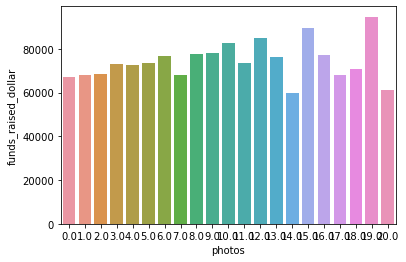

In [72]:
sns.barplot(x='photos', y='funds_raised_dollar', data=nooutlierdata)

사진 업데이트를 많이 할 수록 모금액이 높아지는 경향성이 있다. 

In [106]:
ols('funds_raised_dollar ~ photos', data=nooutlierdata).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     funds_raised_dollar   R-squared:                       0.049
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.9692
Date:                 Sat, 28 Nov 2020   Prob (F-statistic):              0.337
Time:                         00:14:46   Log-Likelihood:                -219.08
No. Observations:                   21   AIC:                             442.2
Df Residuals:                       19   BIC:                             444.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.131e+04   3637.623     19.605      0.000    6.37e+04    7.89e+04
photos       306.3394    311.162      0.985      0.337    -344.930     957.609
==============================================================================
Omnibus:                        0.378   Durbin-Watson:                   2.575
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.002
Skew:                           0.024   Prob(JB):                        0.999
Kurtosis:                       3.015   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

사진을 한개 추가하면 모금액이 306달러 높아지는 것으로 나왔다.  
하지만 p 값이 0.05 이상이라서 통계적으로 유의하지 않다. 

# 사진 업데이트를 한 것과 펀딩 성공의 연관성 

In [85]:
# 업데이트 한 photo 갯수에 따른 성공한 캠페인 갯수 
photo_success = nooutlier.groupby('photos')['dum_success'].sum().reset_index()

In [89]:
# 상단에 만든, nooutlier (업데이트 한 photo 갯수에 따른 펀드금액) 테이블과 합친다. 
res =  photo_success.merge(nooutlierdata, on= 'photos', how='inner')
res

,photos,dum_success,funds_raised_dollar
0,0.0,442,67272.518908
1,1.0,205,67913.640404
2,2.0,83,68452.596774
3,3.0,64,72969.657143
4,4.0,37,72765.387387
5,5.0,27,73464.500000
6,6.0,20,76800.821429
7,7.0,17,67923.130435
8,8.0,10,77686.600000
9,9.0,11,78190.000000


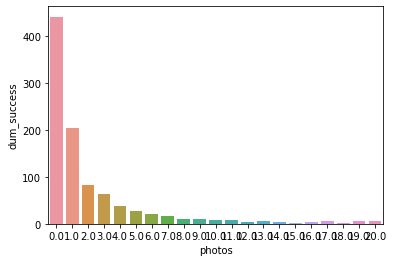

In [90]:
sns.barplot(x='photos', y='dum_success', data=res)

사진을 적게 업데이트할 수록 펀딩 성공하는 캠페인이 더 많았다. 

In [108]:
ols('dum_success ~ photos', data=res).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            dum_success   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     11.14
Date:                Sat, 28 Nov 2020   Prob (F-statistic):            0.00346
Time:                        00:21:01   Log-Likelihood:                -121.52
No. Observations:                  21   AIC:                             247.0
Df Residuals:                      19   BIC:                             249.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    145.7619     34.927      4.173      0.001      72.659     218.865
photos        -9.9714      2.988     -3.338      0.003     -16.225      -3.718
==============================================================================
Omnibus:                       29.844   Durbin-Watson:                   0.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.484
Skew:                           2.428   Prob(JB):                     1.21e-13
Kurtosis:                       9.664   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

사진을 업데이트 1번 하면 성공도 줄어든다.  p 값이 0.05보다 낮으므로 통계적으로 유의하다.  
r 값도 30% 이상의 수치를 보였다. 